In [ ]:
import os
from skimage import io
import tifffile
from scipy import misc
from visualization import ids_to_greyscale, load_depth, show_bounding_boxes, load_stencil_ids, load_stencil_flags

num directories:  3


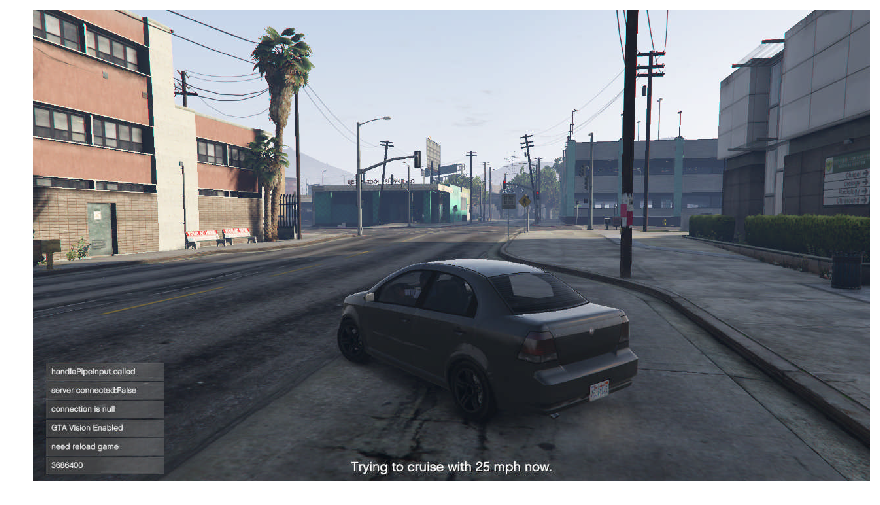

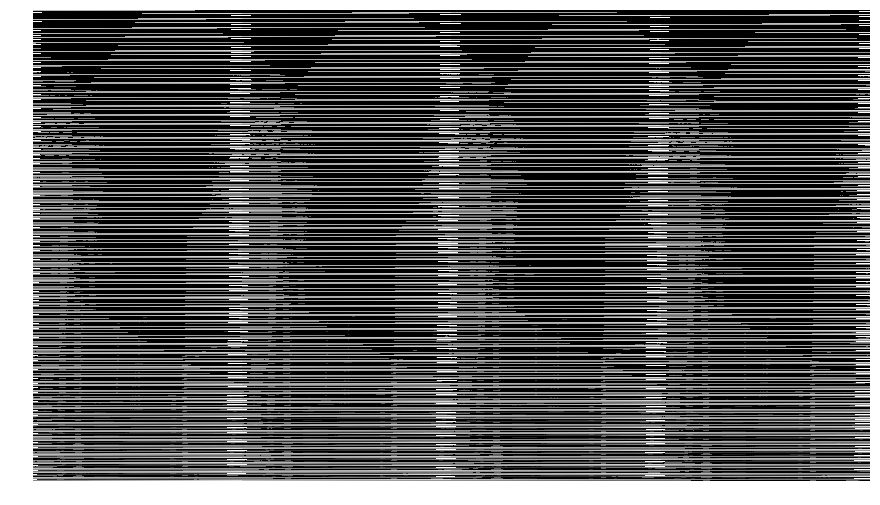

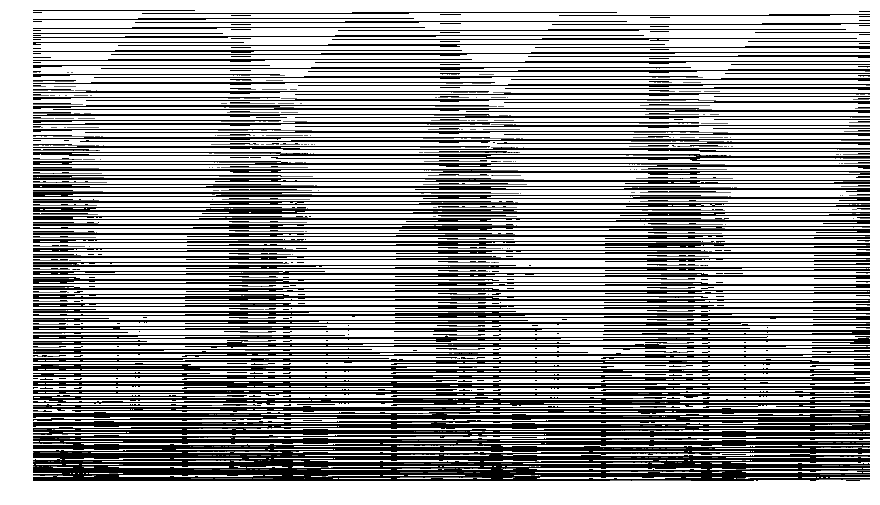

In [2]:
from libtiff import TIFF
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def num_directories(tiffimage):
    count = 1
    TIFF.setdirectory(tiffimage, 0)
    while not TIFF.lastdirectory(tiffimage):
        TIFF.setdirectory(tiffimage, count)
        count += 1
    TIFF.setdirectory(tiffimage, 0)
    return count

imgpath = './45871/45871.tiff'

tiffimg = TIFF.open(str(imgpath))
img = Image.open(str(imgpath))

w = img.width
h = img.height

image = np.empty((h, w, 4), dtype=np.uint8)
depth = np.empty((h, w), dtype=np.float32)
stencil = np.empty((h, w), dtype=np.uint8)

print('num directories: ', num_directories(tiffimg))

TIFF.setdirectory(tiffimg, 0)
TIFF.readencodedstrip(tiffimg, 0, image.ctypes.data, -1)
TIFF.setdirectory(tiffimg, 1)
TIFF.readencodedstrip(tiffimg, 0, depth.ctypes.data, -1)
TIFF.setdirectory(tiffimg, 2)
TIFF.readencodedstrip(tiffimg, 0, stencil.ctypes.data, -1)


fig = plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(image)

fig = plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(depth, cmap='gray')

fig = plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(stencil, cmap='gray')
plt.show()

In [ ]:
from PIL import Image, ImageFile, TiffImagePlugin
import numpy as np
import cv2
ImageFile.LOAD_TRUNCATED_IMAGES = True
TiffImagePlugin.READ_LIBTIFF = True

im = Image.open('./45871/45871.tiff') # with your own image path.
im.seek(1) # use seek() to switch between pages
image = np.array(im.getdata()).reshape(im.size[1], im.size[0], 1)
maximg = np.max(image)
imageint = (image/maximg)*255

print(im.size[0])
print(im.size[1])
cv2.imshow('img',imageint)
cv2.waitKey(0)

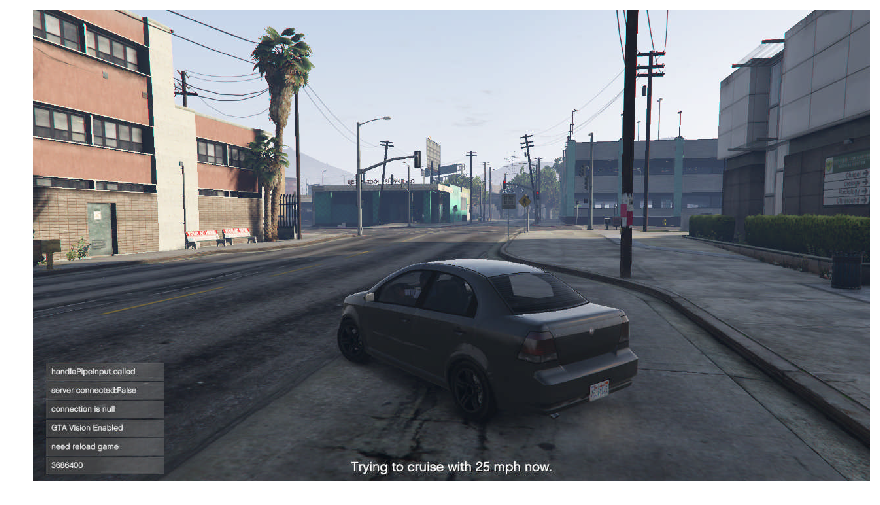

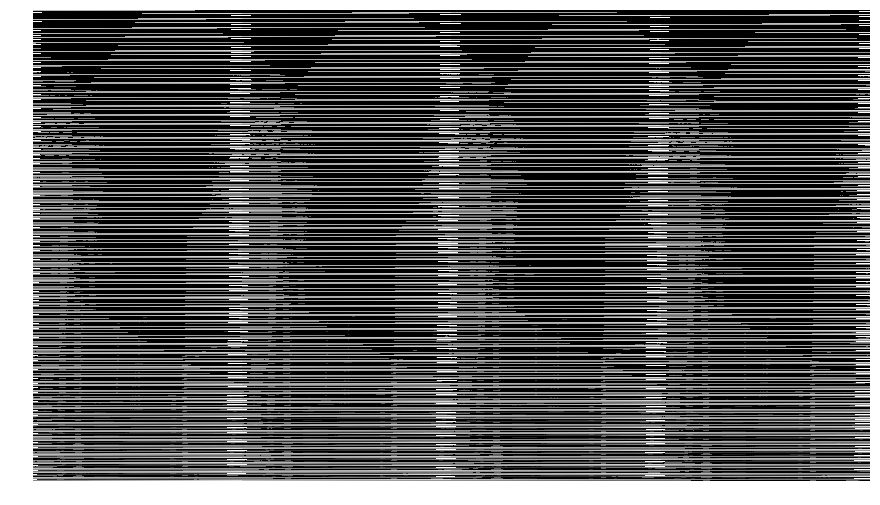

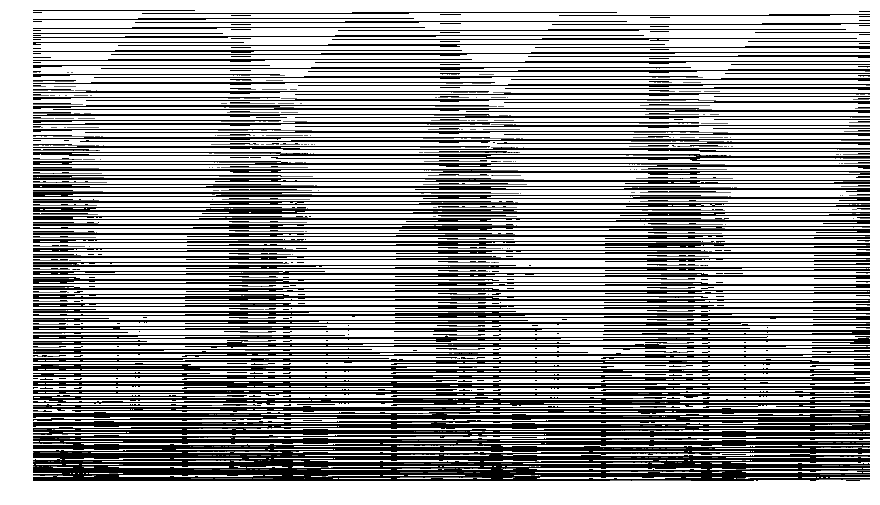

In [3]:
from libtiff import TIFF
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

imgpath = './45871/45871.tiff'

tif = TIFF.open(imgpath, mode='r')
# to read an image in the currect TIFF directory and return it as numpy array:
image = tif.read_image()
# to read all images in a TIFF file:
arr = list(tif.iter_images())

image = arr[0]
depth = arr[1]
stencil = arr[2]

fig = plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(image)

fig = plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(depth, cmap='gray')

fig = plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(stencil, cmap='gray')
plt.show()